# Importar bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de Datos

In [2]:
en = "ISO-8859-1" # encoding usado en el archivo
df = pd.read_csv("../data/e-commerce-data.csv", encoding=en)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Exploración inicial

In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
print(df.count())

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [7]:
print(df.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


Valores faltantes

In [8]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Se puede ver que las columnas CustomerID y Description tienen una cantidad significativa de valores faltantes. Para el análisis, se puede optar por eliminar estas columnas si no son esenciales para el análisis o si los valores faltantes son demasiado numerosos para ser imputados de manera confiable.

Valores duplicados

In [20]:
print(df.duplicated().sum())

5268


In [21]:

print(df[df.duplicated(keep=False)])

       InvoiceNo StockCode                       Description  Quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country    Month  \
485    2010-12-01 11:45:00       

Se observa que hay 5268 filas duplicadas en el conjunto de datos que podrían haberse generado por errores en la entrada de datos o por la presencia de transacciones idénticas. Para limpiar el conjunto de datos, se pueden eliminar estas filas duplicadas utilizando el método drop_duplicates() de pandas.

Visualización de datos que muestren relaciones significativas

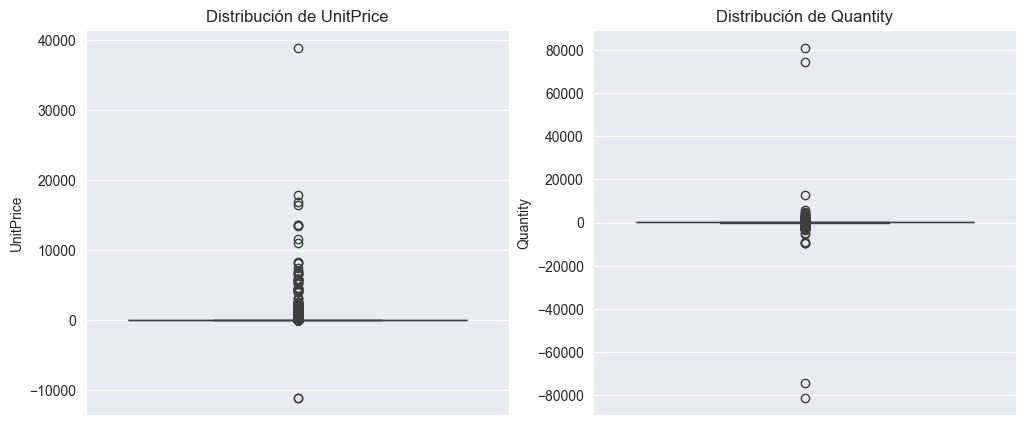

In [9]:
#1. Relación entre Quantity y UnitPrice
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["UnitPrice"])
plt.title("Distribución de UnitPrice")
plt.subplot(1,2,2)
sns.boxplot(y=df["Quantity"])
plt.title("Distribución de Quantity")
plt.show()

En estas visualizaciones, podemos observar que tanto la columna "UnitPrice" como la columna "Quantity" tienen unos cuantos outliers significativos. En el caso de "UnitPrice", hay valores extremadamente altos que podrían representar productos de lujo o errores en la entrada de datos, así como un caso con precio negativo que podría ser un error, además de productos con precio cero que podrían ser muestras gratuitas o promociones. En el caso de "Quantity", hay valores negativos que podrían indicar devoluciones o errores en la entrada de datos, así como valores extremadamente altos que podrían representar compras al por mayor o errores. Se debería investigar más a fondo estos outliers para determinar si deben ser eliminados o corregidos.

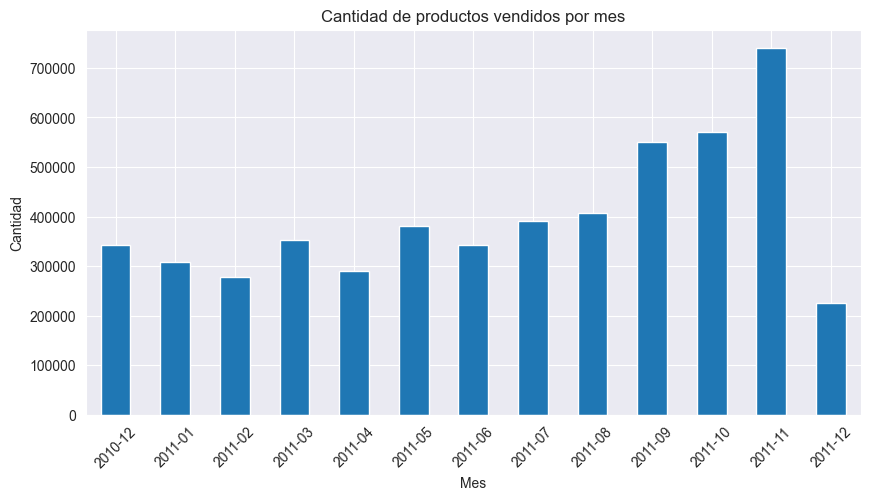

In [14]:
#3. Relación entre ventas y tiempo (ventas por mes)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
ventas_por_mes = df.groupby('Month')['Quantity'].sum()
plt.figure(figsize=(10,5))
ventas_por_mes.plot(kind='bar')
plt.title('Cantidad de productos vendidos por mes')
plt.ylabel('Cantidad')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.show()

En esta visualización, podemos observar que las ventas tienen un incremento notable desde junio hasta noviembre de 2011, con un pico significativo en noviembre. Posteriormente, en diciembre, se ve una caída enorme en las ventas. Esto podría estar relacionado con eventos estacionales o promociones especiales durante esos meses.

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13864\1194635795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


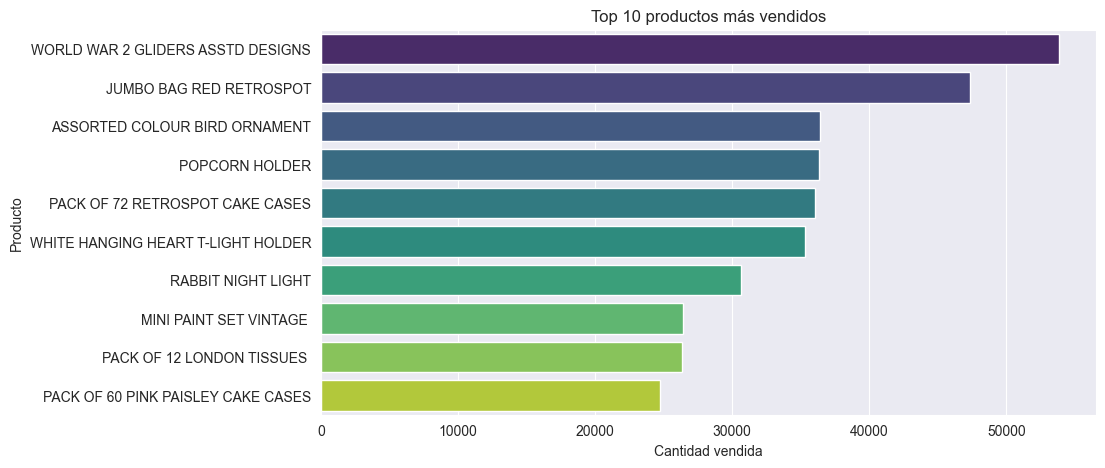

In [12]:
#4. Top 10 productos más vendidos
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 productos más vendidos')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.show()

En este caso, podemos observar que el producto más vendido es "WORLD WAR 2 GLIDERS ASST DESIGNS", seguido por "JUMBO BAG RED RETROSPOT" y "ASSORTED COLOUR BIRD ORNAMENT". Estos productos parecen ser muy populares entre los clientes y podrían ser considerados para promociones o descuentos especiales, así como determinar las preferencias y tendencias de compra de los clientes.

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_8628\3709769557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_pais.values, y=ventas_por_pais.index, palette='magma')


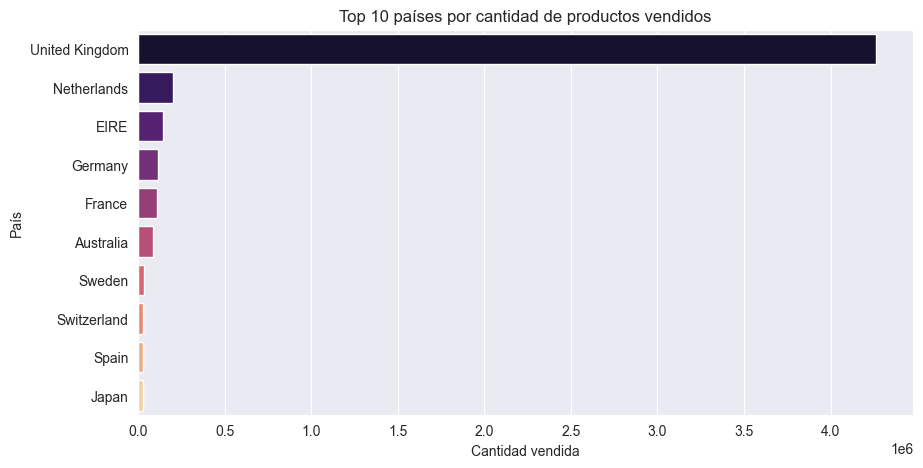

In [5]:
#5. Relación entre país y ventas
ventas_por_pais = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=ventas_por_pais.values, y=ventas_por_pais.index, palette='magma')
plt.title('Top 10 países por cantidad de productos vendidos')
plt.xlabel('Cantidad vendida')
plt.ylabel('País')
plt.show()

En este gráfico se ve que el Reino Unido es el país con la mayor cantidad de productos vendidos con mucha diferencia, seguido por Países Bajos e Irlanda. Teniendo en cuenta que la tienda está ubicada en el Reino Unido, es lógico que la mayoría de las ventas provengan de allí. Además, al ser una tienda de regalos, es probable que muchos clientes compren productos para enviar como regalos a otros países, lo que podría explicar la presencia de otros países en el top 10. Esto sugiere que la tienda tiene un alcance internacional y que los clientes valoran la posibilidad de enviar regalos a diferentes destinos.

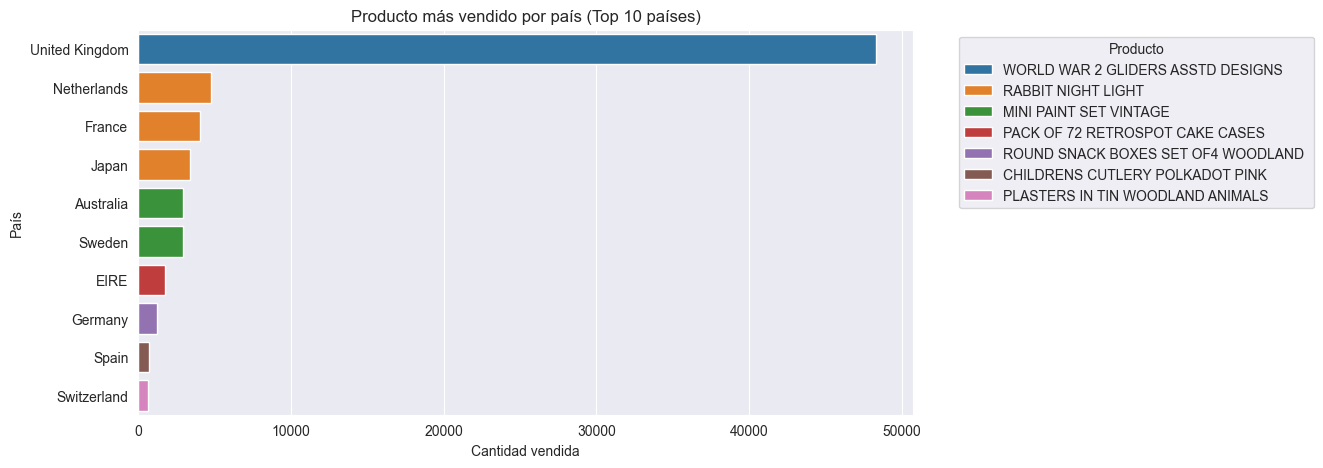

In [7]:
# El producto más vendido por país
top_product_per_country = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()
top_product_per_country = top_product_per_country.loc[top_product_per_country.groupby('Country')['Quantity'].idxmax()]
top_product_per_country = top_product_per_country.sort_values(by='Quantity', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Quantity', y='Country', data=top_product_per_country, hue='Description', dodge=False)
plt.title('Producto más vendido por país (Top 10 países)')
plt.xlabel('Cantidad vendida')
plt.ylabel('País')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Limpieza de datos

In [ ]:
# Eliminar columnas con muchos valores faltantes
df_cleaned = df.drop(columns=['CustomerID'])


In [ ]:
# Realizar imputación para la columna de quantity (reemplazar valores negativos por la mediana)
median_quantity = df_cleaned['Quantity'].median()
df_cleaned['Quantity'] = df_cleaned['Quantity'].apply(lambda x: median_quantity if x < 0 else x)

In [ ]:
# Imputación para la columna de UnitPrice (reemplazar valores negativos por la mediana)
median_unit_price = df_cleaned['UnitPrice'].median()
df_cleaned['UnitPrice'] = df_cleaned['UnitPrice'].apply(lambda x: median_unit_price if x < 0 else x)

In [ ]:
# Eliminar filas duplicadas
df_cleaned = df_cleaned.drop_duplicates()